In [1]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

In [2]:
data1 = xlrd.open_workbook('../SPALP/data/miRNA_sim.xlsx')
table = data1.sheets()[0]
nrows = table.nrows
mirna_sim_dict = {}
for cnt in range(nrows):
    value = table.row_values(cnt)
    mirna_sim_dict[cnt+1] = value
print(type(mirna_sim_dict))
data2 = xlrd.open_workbook('../SPALP/data/disease_sim.xlsx')
table = data2.sheets()[0]
nrows = table.nrows
disease_sim_dict = {}
for cnt in range(nrows):
    value = table.row_values(cnt)
    disease_sim_dict[cnt+1] = value
print(type(disease_sim_dict))


mm_sim_dict = mirna_sim_dict
dd_sim_dict = disease_sim_dict
total_sample = []
Label = []

<class 'dict'>
<class 'dict'>


In [3]:
def plotting(estimator,y_test):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test)
    precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
    axes[0].plot(precisions,recalls)
    axes[0].set_title("平均精准率：%.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")

    fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
    axes[1].plot(fpr,tpr)
    axes[1].set_title("AUC值：%.2f"%auc(fpr,tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")

# Combination

In [4]:
mirna_data_dict = np.load('../SPALP/data/data(495).npy')
disease_data_dict = np.load('../SPALP/data/data(383).npy')
mirna_data_dict = {i + 1: row for i, row in enumerate(mirna_data_dict)}
disease_data_dict = {i + 1: row for i, row in enumerate(disease_data_dict)}
mm_sim_dict = mirna_sim_dict
dd_sim_dict = disease_sim_dict
total_sample = []
Label = []
with open('../SPALP/data/train_data.txt') as f:
    for line in f:
        item = line.strip().split('\t')
        mirna = int(item[0])
        disease = int(item[1])
        label = int(item[2])
        Label.append(label)
        mirna_ver = mm_sim_dict[mirna] + mirna_data_dict[mirna].tolist()
        disease_ver = dd_sim_dict[disease] + disease_data_dict[disease].tolist()
        ver = mirna_ver + disease_ver
        total_sample.append(ver)
total_sample.reverse()
Label.reverse()
feature5 = np.array(total_sample)
target5 = np.array(Label)
print(feature5.shape)
print(target5.shape)

(10849, 1006)
(10849,)


准确率： 0.8654262301003032


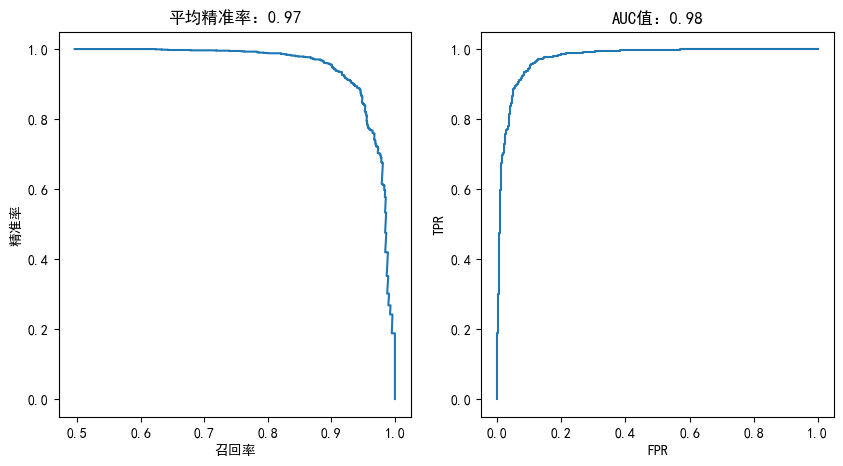

MLP的AUC值为： 0.9756367954982568
MLP的PR值为: 0.9725432860206675
              precision    recall  f1-score   support

           0     0.9264    0.9205    0.9234      1094
           1     0.9197    0.9257    0.9226      1076

    accuracy                         0.9230      2170
   macro avg     0.9230    0.9231    0.9230      2170
weighted avg     0.9231    0.9230    0.9230      2170



In [8]:
X_train,X_test,y_train,y_test = train_test_split(feature5,target5,test_size=0.2)
mlp = MLPClassifier(hidden_layer_sizes=(200,), max_iter=300, activation='relu', solver='adam', random_state=42)
scores = cross_val_score(mlp,feature5,target5,cv=5)
print("准确率：",scores.mean())
mlp.fit(X_train,y_train)
y_predict = mlp.predict(X_test)
plotting(mlp,y_test)
plt.show()
y_predict_proba = mlp.predict_proba(X_test)
fpr5,tpr5,thretholds5 = roc_curve(y_test,y_predict_proba[:,1])
precisions5,recalls5,thretholds5 = precision_recall_curve(y_test,y_predict_proba[:,1])
a5 = auc(fpr5,tpr5)
b5 = average_precision_score(y_test,y_predict_proba[:,1])
print('MLP的AUC值为：',a5)
print('MLP的PR值为:',b5)
print(classification_report(y_test,y_predict,digits = 4))